In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/data-sets/IBM.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/data-sets/IBM.csv", index_col="Date", parse_dates=["Date"], usecols=[0, 2])

In [ ]:
dataset

,High
Date,
2006-01-03,41.22
2006-01-04,41.90
2006-01-05,41.73
2006-01-06,43.57
2006-01-09,43.66
...,...
2017-12-22,71.87
2017-12-26,71.39
2017-12-27,70.49


In [ ]:
training_set = dataset[:'2016'].values
test_set = dataset["2017":].values

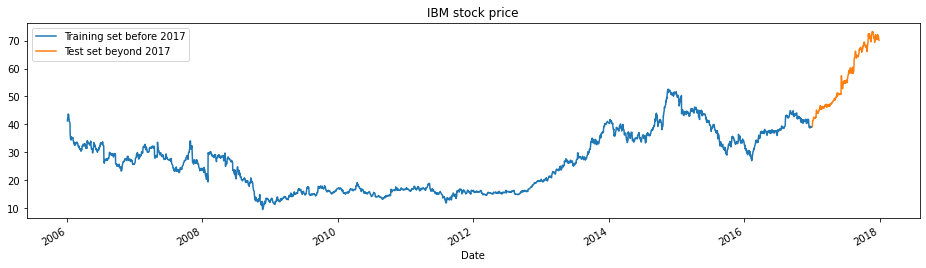

In [ ]:
dataset["High"][:"2016"].plot(figsize=(16, 4), legend=True)
dataset["High"]["2017":].plot(figsize=(16, 4), legend=True)
plt.legend(["Training set before 2017", "Test set beyond 2017"])
plt.title("IBM stock price")
plt.show()

In [ ]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.73574409],
       [0.75150672],
       [0.74756606],
       ...,
       [0.6893834 ],
       [0.6826611 ],
       [0.68428373]])

In [ ]:
x_train = []
y_train = []

for i in range(10, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2758, 10)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2758, 10, 1)

In [ ]:
# import libraries 
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units=10))
regressor.add(Dropout(0.2))
regressor.add(Dense(1)) # output layer

In [ ]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
87/87 [==============================] - 3s 6ms/step - loss: 0.0125
Epoch 2/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0063
Epoch 3/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 4/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0050
Epoch 5/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0041
Epoch 6/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0040
Epoch 7/100
87/87 [==============================] - 1s 8ms/step - loss: 0.0035
Epoch 8/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0033
Epoch 9/100
87/87 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 10/100
87/87 [==============================] - 1s 7ms/step - loss: 0.0029
Epoch 11/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0029
Epoch 12/100
87/87 [==============================] - 1s 6ms/step - loss: 0.0024
Epoch 13/100
87/87 [=================

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_set.shape

(251, 1)

In [ ]:
inputs = dataset[len(dataset)-len(test_set)-10:].values
inputs.shape

(261, 1)

In [ ]:
inputs = sc.fit_transform(inputs)

In [ ]:
X_test = []
for i in range(10, len(inputs)):
  X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

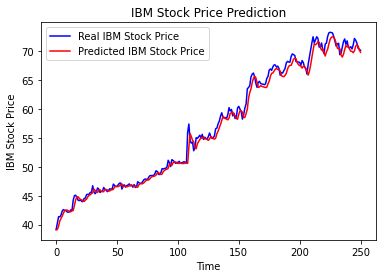

In [ ]:
plt.plot(test_set, color="blue", label="Real IBM Stock Price")
plt.plot(predicted_stock_price, color="red", label="Predicted IBM Stock Price")
plt.title("IBM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("IBM Stock Price")
plt.legend()
plt.show()